In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [31]:
# csvファイルからPandas DataFrameへ読み込み
data = pd.read_csv('rand_kabuka_1.csv', delimiter=',', low_memory=False, header=None)
data.columns = ['x', 'y']

# 冒頭を表示して確認
data.head()

,x,y
0,0,67000.00000
1,1,71297.49458
2,2,75186.53415
3,3,78522.60245
4,4,81178.06986


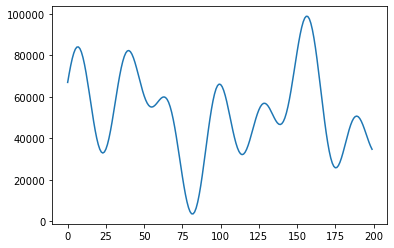

In [32]:
data.y.plot()

In [33]:
# データを標準化する
y_data = data.y.values
xmean = y_data.mean()
xstd  = np.std(y_data)
zscore = (y_data-xmean)/xstd

Y = pd.DataFrame(zscore)

Y.head()

,0
0,0.688866
1,0.895568
2,1.082624
3,1.243083
4,1.370807


In [34]:
# 10日分のデータを１塊とした窓を作る
n_prev = 10
def _load_data(split_data):
    docX, docY = [], []
    for i in range(len(split_data)-n_prev):
        docX.append(split_data.iloc[i:i+n_prev].values)
        docY.append(split_data.iloc[i+n_prev].values)
    alsX = np.array(docX)
    alsY = np.array(docY)
    
    return alsX, alsY

In [45]:
# データを訓練データと検証データに分割する
split_num = 100
x_train, y_train = _load_data(Y.iloc[0:split_num])
x_test, y_test = _load_data(Y.iloc[split_num:])

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((90, 10, 1), (90, 1), (90, 10, 1), (90, 1))

In [50]:
# RMSE関数を定義
def rmse(y_pred, y_true):
    return np.sqrt(((y_true - y_pred) ** 2).mean())

In [46]:
# パラメータ設定
length_of_sequences = x_train.shape[1]
hidden_neurons = 100
in_out_neurons = 1

# LSTM-------------------------------------------

In [47]:
# RNN(LSTM)モデルを構築
model = keras.Sequential([
        keras.layers.LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_out_neurons), return_sequences=False),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(in_out_neurons, activation='linear'),
])

In [48]:
# モデルをコンパイルして構造を表示
model.compile(optimizer='adam',
              loss='mean_squared_error')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [49]:
# 学習させる
model.fit(x_train, y_train, batch_size=12, epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 7ms/step - loss: 0.9455
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4591
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4478
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3099
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3033
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2012
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1320
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0667
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0666
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0577
Epoch 11/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0517
Epoch 12/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0553
Epoch 13/100
8/8 [==============================] - 0s 6ms/st

In [51]:
# 学習データへの精度
y_train_pred = model.predict(x_train)
print('RMSE: %.3f' % rmse(y_train, y_train_pred))
print('r2: %.3f' % r2_score(y_train, y_train_pred))

RMSE: 0.051
r2: 0.998


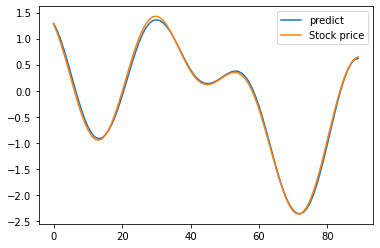

In [52]:
# 実績と比較
dataf =  pd.DataFrame(y_train_pred)
dataf.columns = ["predict"]
dataf["Stock price"] = y_train
dataf.plot()

In [53]:
# 検証データへの精度
y_test_pred = model.predict(x_test)
print('RMSE: %.3f' % rmse(y_train, y_train_pred))
print('r2: %.3f' % r2_score(y_test, y_test_pred))

RMSE: 0.051
r2: 0.993


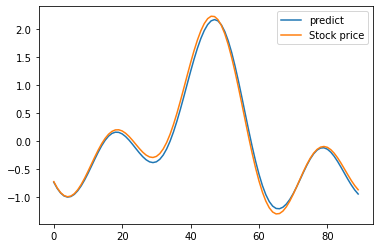

In [54]:
# 実績と比較
dataf =  pd.DataFrame(y_test_pred)
dataf.columns = ["predict"]
dataf["Stock price"] = y_test
dataf.plot()

# GRU-------------------------------------------

In [57]:
# RNN(LSTM)モデルを構築
model_GRU = keras.Sequential([
        keras.layers.GRU(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_out_neurons), return_sequences=False),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(in_out_neurons, activation='linear'),
])

In [58]:
# モデルをコンパイルして構造を表示
model_GRU.compile(optimizer='adam',
              loss='mean_squared_error')

model_GRU.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 100)               30900     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 31,001
Trainable params: 31,001
Non-trainable params: 0
_________________________________________________________________


In [59]:
# 学習させる
model_GRU.fit(x_train, y_train, batch_size=12, epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 6ms/step - loss: 1.2714
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4487
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2496
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2219
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1389
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1286
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0846
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0741
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0447
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0414
Epoch 11/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0280
Epoch 12/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0251
Epoch 13/100
8/8 [==============================] - 0s 8ms/st

In [60]:
# 学習データへの精度
y_train_pred = model_GRU.predict(x_train)
print('RMSE: %.3f' % rmse(y_train, y_train_pred))
print('r2: %.3f' % r2_score(y_train, y_train_pred))

RMSE: 0.037
r2: 0.999


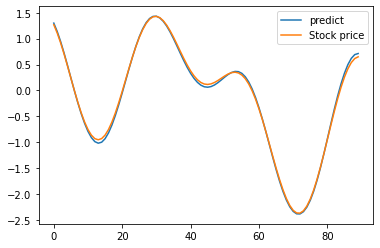

In [61]:
# 実績と比較
dataf =  pd.DataFrame(y_train_pred)
dataf.columns = ["predict"]
dataf["Stock price"] = y_train
dataf.plot()

In [62]:
# 検証データへの精度
y_test_pred = model_GRU.predict(x_test)
print('RMSE: %.3f' % rmse(y_train, y_train_pred))
print('r2: %.3f' % r2_score(y_test, y_test_pred))

RMSE: 0.037
r2: 0.995


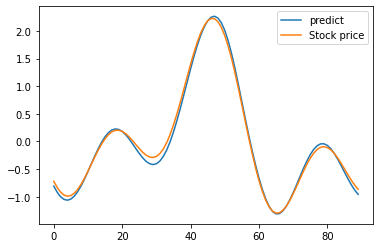

In [63]:
# 実績と比較
dataf =  pd.DataFrame(y_test_pred)
dataf.columns = ["predict"]
dataf["Stock price"] = y_test
dataf.plot()